In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
directory = '/home/ucsd-train25/scratch/projects/macosko_batch1_downsampled/processed_files/'

In [17]:
filtered_counts = pd.read_csv(directory+"counts_filtered.csv", index_col=0)
print(filtered_counts.shape)
filtered_counts.head()

(603, 2500)


,GGCCGCAGTCCG,CTTGTGCGGGAA,AGTCAAGCCCTC,GTGCCGCCTCTC,GCGCAACTGCTC,TGCGAGAGCTTG,GATTGGGAGGCA,CCTCCTAGTTGG,GATTTCCTCTGA,TTCTTTTTTCAA,...,GAGTGAATCCCC,GGGCGAGTGATG,TCCCGGGACGCT,AGGAAGGATTTT,TCACAACTCCAC,CGCTCTTCAAAC,TCCTAACTCTCA,AAATAGGCATAT,GACTCAGCAAAT,CTCTTACGAGCA
GENE,,,,,,,,,,,,,,,,,,,,,
1700020I14Rik,5,4,9,1,5,4,2,2,3,6,...,0,0,1,0,0,0,2,0,1,1
1810009A15Rik,2,2,18,9,0,11,2,1,0,3,...,0,3,1,2,0,0,1,1,0,0
2010107E04Rik,16,24,6,8,18,7,9,8,6,3,...,2,0,0,0,2,0,0,0,0,0
2610034M16Rik,0,0,2,10,0,5,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0
2700089E24Rik,8,7,3,2,7,3,7,7,10,2,...,1,0,1,0,0,0,0,0,0,0


**First we will scale the counts for sequencing depth**

Do we need a length normalization here? Why or why not? 

Scaling for sequencing depth: Divide each count by the total reads in that libary and multiply by some scaling factor (so we aren't dealing with tiny tiny numbers). In this case, we will use 10000 as the scaling factor. 

In [18]:
#Use sum to get the total sequencing depth per cell

filtered_counts.sum().head()

GGCCGCAGTCCG    6509
CTTGTGCGGGAA    6479
AGTCAAGCCCTC    5714
GTGCCGCCTCTC    5074
GCGCAACTGCTC    4889
dtype: int64

In [19]:
((filtered_counts/filtered_counts.sum())*10000).head()

,GGCCGCAGTCCG,CTTGTGCGGGAA,AGTCAAGCCCTC,GTGCCGCCTCTC,GCGCAACTGCTC,TGCGAGAGCTTG,GATTGGGAGGCA,CCTCCTAGTTGG,GATTTCCTCTGA,TTCTTTTTTCAA,...,GAGTGAATCCCC,GGGCGAGTGATG,TCCCGGGACGCT,AGGAAGGATTTT,TCACAACTCCAC,CGCTCTTCAAAC,TCCTAACTCTCA,AAATAGGCATAT,GACTCAGCAAAT,CTCTTACGAGCA
GENE,,,,,,,,,,,,,,,,,,,,,
1700020I14Rik,7.681672,6.173792,15.750788,1.970832,10.227040,10.333247,5.234232,5.259006,8.925915,17.996401,...,0.000000,0.000000,36.49635,0.000000,0.000000,0.0,72.992701,0.00000,36.630037,36.630037
1810009A15Rik,3.072669,3.086896,31.501575,17.737485,0.000000,28.416430,5.234232,2.629503,0.000000,8.998200,...,0.000000,109.489051,36.49635,72.992701,0.000000,0.0,36.496350,36.49635,0.000000,0.000000
2010107E04Rik,24.581349,37.042754,10.500525,15.766654,36.817345,18.083183,23.554043,21.036024,17.851830,8.998200,...,72.992701,0.000000,0.00000,0.000000,72.992701,0.0,0.000000,0.00000,0.000000,0.000000
2610034M16Rik,0.000000,0.000000,3.500175,19.708317,0.000000,12.916559,0.000000,0.000000,0.000000,8.998200,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,36.630037,0.000000
2700089E24Rik,12.290674,10.804136,5.250263,3.941663,14.317856,7.749935,18.319812,18.406521,29.753050,5.998800,...,36.496350,0.000000,36.49635,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000


In [20]:
#Save this output to a new dataframe that we will call scaled_counts
scaled_counts = (filtered_counts/filtered_counts.sum())*10000

#Do we have the number of rows and column that are expected?? 
#Always look at the shape and head when you make a new dataframe.
print(scaled_counts.shape)
scaled_counts.head()

(603, 2500)


,GGCCGCAGTCCG,CTTGTGCGGGAA,AGTCAAGCCCTC,GTGCCGCCTCTC,GCGCAACTGCTC,TGCGAGAGCTTG,GATTGGGAGGCA,CCTCCTAGTTGG,GATTTCCTCTGA,TTCTTTTTTCAA,...,GAGTGAATCCCC,GGGCGAGTGATG,TCCCGGGACGCT,AGGAAGGATTTT,TCACAACTCCAC,CGCTCTTCAAAC,TCCTAACTCTCA,AAATAGGCATAT,GACTCAGCAAAT,CTCTTACGAGCA
GENE,,,,,,,,,,,,,,,,,,,,,
1700020I14Rik,7.681672,6.173792,15.750788,1.970832,10.227040,10.333247,5.234232,5.259006,8.925915,17.996401,...,0.000000,0.000000,36.49635,0.000000,0.000000,0.0,72.992701,0.00000,36.630037,36.630037
1810009A15Rik,3.072669,3.086896,31.501575,17.737485,0.000000,28.416430,5.234232,2.629503,0.000000,8.998200,...,0.000000,109.489051,36.49635,72.992701,0.000000,0.0,36.496350,36.49635,0.000000,0.000000
2010107E04Rik,24.581349,37.042754,10.500525,15.766654,36.817345,18.083183,23.554043,21.036024,17.851830,8.998200,...,72.992701,0.000000,0.00000,0.000000,72.992701,0.0,0.000000,0.00000,0.000000,0.000000
2610034M16Rik,0.000000,0.000000,3.500175,19.708317,0.000000,12.916559,0.000000,0.000000,0.000000,8.998200,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,36.630037,0.000000
2700089E24Rik,12.290674,10.804136,5.250263,3.941663,14.317856,7.749935,18.319812,18.406521,29.753050,5.998800,...,36.496350,0.000000,36.49635,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000


The sum of all the values in all the columns should now be the same. Are they? 

In [21]:
scaled_counts.sum().head()

GGCCGCAGTCCG    10000.0
CTTGTGCGGGAA    10000.0
AGTCAAGCCCTC    10000.0
GTGCCGCCTCTC    10000.0
GCGCAACTGCTC    10000.0
dtype: float64

**Select only variable genes for analysis**

Variation in gene expression is correlated with mean expression level of a gene. We are going to calculate the squared coefficient of variation and compare that the mean expression level in log space. To select genes that are varying in this dataset, we will pick the genes that fall off the linear regression line. See more details [here](https://www.nature.com/articles/nmeth.2645).

.std is a pandas function that will calculate the standard deviation across either the row or column of the dataframe (set by the axis). To get the squared coefficient of variation, we are going to take the standard deviation / mean and square the result. In python ** is equavalent to "to the power of". Or in our case, squared. Use the log10 function in numpy to convert the result into log10 space. Save this output as coef_var. Take a look at the result.

In [29]:
coef_var = np.log10((scaled_counts.std(axis=1)/scaled_counts.mean(axis=1))**2)
coef_var.head()

GENE
1700020I14Rik    0.342417
1810009A15Rik    0.374516
2010107E04Rik    0.289777
2610034M16Rik    0.842193
2700089E24Rik    0.461686
dtype: float64

In [30]:
means = np.log10(scaled_counts.mean(axis=1))
means.head()

GENE
1700020I14Rik    1.085780
1810009A15Rik    1.215648
2010107E04Rik    1.219104
2610034M16Rik    0.675434
2700089E24Rik    0.989286
dtype: float64

We are going to put these results back into a dataframe for ease of plotting. 

In [31]:
var_df = pd.DataFrame([coef_var,means]).T
var_df.head()

,0,1
GENE,,
1700020I14Rik,0.342417,1.085780
1810009A15Rik,0.374516,1.215648
2010107E04Rik,0.289777,1.219104
2610034M16Rik,0.842193,0.675434
2700089E24Rik,0.461686,0.989286


Let's change the column names to something useful. 

In [32]:
#inplace=True will save the changes to the dataframe being operated on
#rather than having to start your command with new_df = 

var_df.rename(columns = {0:"variance",1:"mean"}, inplace=True)
var_df.head()

,variance,mean
GENE,,
1700020I14Rik,0.342417,1.085780
1810009A15Rik,0.374516,1.215648
2010107E04Rik,0.289777,1.219104
2610034M16Rik,0.842193,0.675434
2700089E24Rik,0.461686,0.989286


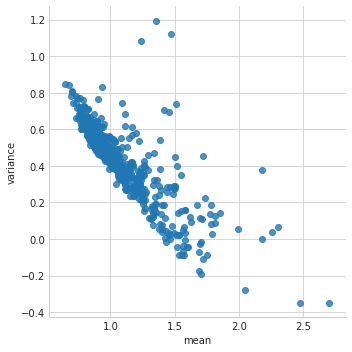

In [34]:
sns.set_style("whitegrid")

sns.lmplot('mean','variance',var_df, fit_reg=False)

We will use the stats module loaded from scipy to calculate the linear regression line for this data. Take a look at the result. It is a list of values.

In [35]:
result = stats.linregress(var_df['mean'], var_df['variance'])
result

LinregressResult(slope=-0.5884910812808134, intercept=1.0658809056250851, rvalue=-0.81007079612587507, pvalue=1.8103357664239838e-141, stderr=0.017374940592340602)

To grab the values we are interested in (slope and y intercept), select the values out of the list. The slope is stored in the first value (position 0) and yintercept is the second value (position 1). Print the values you found to make sure they match the result you see above. 

In [36]:
slope = result[0]
yint = result[1]
print(slope)
print(yint)

-0.588491081281
1.06588090563


To determine which genes have a variation that is greater than we would expect, we first need to calculate what we expect for each gene. Back to simple algebra: y=mx+b

In [37]:
var_df['expected'] = var_df['mean']*slope + yint
var_df.head()

,variance,mean,expected
GENE,,,
1700020I14Rik,0.342417,1.085780,0.426909
1810009A15Rik,0.374516,1.215648,0.350483
2010107E04Rik,0.289777,1.219104,0.348449
2610034M16Rik,0.842193,0.675434,0.668394
2700089E24Rik,0.461686,0.989286,0.483695


Let's grab genes with a variance >0.25 more than the expected value and plot these with a different color. We will create another column in the dataframe with a True/False result if the gene passes our criteria

In [40]:
var_df['sig'] = (var_df['variance'] - var_df['expected']) > 0.1
var_df.head()

,variance,mean,expected,sig
GENE,,,,
1700020I14Rik,0.342417,1.085780,0.426909,False
1810009A15Rik,0.374516,1.215648,0.350483,False
2010107E04Rik,0.289777,1.219104,0.348449,False
2610034M16Rik,0.842193,0.675434,0.668394,True
2700089E24Rik,0.461686,0.989286,0.483695,False


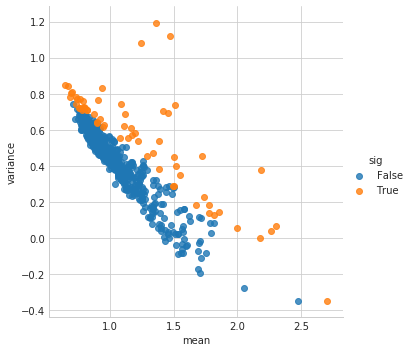

In [41]:
sns.lmplot('mean','variance',var_df, hue='sig', fit_reg=False)

Let's get a list of variable genes so we can subset the dataframe for only those genes. 

First, we will ask the question: which rows have a value in the column 'sig' == True:

In [42]:
(var_df['sig'] == True).head()

GENE
1700020I14Rik    False
1810009A15Rik    False
2010107E04Rik    False
2610034M16Rik     True
2700089E24Rik    False
Name: sig, dtype: bool

Look familiar? We have a boolean of True/False with gene names (dataframe index). Subset the counts dataframe with .loc

In [43]:
variable_scaled_counts = scaled_counts.loc[var_df['sig'] == True]
print(variable_scaled_counts.shape)
variable_scaled_counts.head()

(64, 2500)


,GGCCGCAGTCCG,CTTGTGCGGGAA,AGTCAAGCCCTC,GTGCCGCCTCTC,GCGCAACTGCTC,TGCGAGAGCTTG,GATTGGGAGGCA,CCTCCTAGTTGG,GATTTCCTCTGA,TTCTTTTTTCAA,...,GAGTGAATCCCC,GGGCGAGTGATG,TCCCGGGACGCT,AGGAAGGATTTT,TCACAACTCCAC,CGCTCTTCAAAC,TCCTAACTCTCA,AAATAGGCATAT,GACTCAGCAAAT,CTCTTACGAGCA
GENE,,,,,,,,,,,,,,,,,,,,,
2610034M16Rik,0.000000,0.000000,3.500175,19.708317,0.000000,12.916559,0.000000,0.000000,0.000000,8.9982,...,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.00000,0.0,36.630037,0.0
A930003A15Rik,0.000000,0.000000,10.500525,15.766654,0.000000,23.249806,0.000000,0.000000,0.000000,5.9988,...,0.0,72.992701,36.49635,36.49635,0.0,0.000000,0.00000,0.0,0.000000,0.0
Acsl3,1.536334,13.891033,3.500175,3.941663,0.000000,5.166624,18.319812,0.000000,2.975305,5.9988,...,0.0,36.496350,0.00000,0.00000,0.0,0.000000,36.49635,0.0,73.260073,0.0
Apc,13.827009,15.434481,7.000350,5.912495,6.136224,5.166624,20.936928,21.036024,2.975305,5.9988,...,0.0,36.496350,0.00000,0.00000,0.0,72.992701,0.00000,0.0,0.000000,0.0
App,47.626363,54.020682,0.000000,0.000000,77.725506,0.000000,107.301753,89.403103,47.604880,0.0000,...,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0


**Convert scaled counts into z-scores**

Lastly, we will calculate the zscore of each gene across the rows to use as input for clustering and dimensionality reduction. 

In [44]:
stats.zscore(variable_scaled_counts, axis=1)

array([[-0.37930666, -0.37930666, -0.09899147, ..., -0.37930666,
         2.55424826, -0.37930666],
       [-0.49341516, -0.49341516,  0.09500632, ..., -0.49341516,
        -0.49341516, -0.49341516],
       [-0.26248601, -0.05835679, -0.23003866, ..., -0.28786994,
         0.92256204, -0.28786994],
       ..., 
       [-0.37606196, -0.37606196,  0.21444047, ..., -0.37606196,
        -0.37606196, -0.37606196],
       [-0.44227736, -0.33965285,  0.48863511, ..., -0.44227736,
         1.99326928, -0.44227736],
       [-0.48340703, -0.59836076, -0.20551835, ...,  0.76702947,
         0.7720309 , -0.59836076]])

The output of this is an array, so let's put this back into a dataframe with the appropriate row and column labels

In [45]:
zscore_array = stats.zscore(variable_scaled_counts, axis=1)

zscore_variable_genes = pd.DataFrame(zscore_array, index = variable_scaled_counts.index)
zscore_variable_genes.columns = variable_scaled_counts.columns
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(64, 2500)


,GGCCGCAGTCCG,CTTGTGCGGGAA,AGTCAAGCCCTC,GTGCCGCCTCTC,GCGCAACTGCTC,TGCGAGAGCTTG,GATTGGGAGGCA,CCTCCTAGTTGG,GATTTCCTCTGA,TTCTTTTTTCAA,...,GAGTGAATCCCC,GGGCGAGTGATG,TCCCGGGACGCT,AGGAAGGATTTT,TCACAACTCCAC,CGCTCTTCAAAC,TCCTAACTCTCA,AAATAGGCATAT,GACTCAGCAAAT,CTCTTACGAGCA
GENE,,,,,,,,,,,,,,,,,,,,,
2610034M16Rik,-0.379307,-0.379307,-0.098991,1.199055,-0.379307,0.655130,-0.379307,-0.379307,-0.379307,0.341324,...,-0.379307,-0.379307,-0.379307,-0.379307,-0.379307,-0.379307,-0.379307,-0.379307,2.554248,-0.379307
A930003A15Rik,-0.493415,-0.493415,0.095006,0.390106,-0.493415,0.809442,-0.493415,-0.493415,-0.493415,-0.157258,...,-0.493415,3.596902,1.551743,1.551743,-0.493415,-0.493415,-0.493415,-0.493415,-0.493415,-0.493415
Acsl3,-0.262486,-0.058357,-0.230039,-0.222744,-0.287870,-0.202505,0.014817,-0.287870,-0.238711,-0.188755,...,-0.287870,0.315137,-0.287870,-0.287870,-0.287870,-0.287870,0.315137,-0.287870,0.922562,-0.287870
Apc,0.078852,0.149589,-0.221557,-0.269429,-0.259584,-0.302251,0.391726,0.396087,-0.398681,-0.265631,...,-0.529610,1.076423,-0.529610,-0.529610,-0.529610,2.682457,-0.529610,-0.529610,-0.529610,-0.529610
App,1.148323,1.372090,-0.518350,-0.518350,2.201635,-0.518350,3.236648,2.610289,1.147571,-0.518350,...,-0.518350,-0.518350,-0.518350,-0.518350,-0.518350,-0.518350,-0.518350,-0.518350,-0.518350,-0.518350


**Save this dataframe**

In [48]:
save_dir = '/home/ucsd-train25/scratch/projects/macosko_batch1_downsampled/processed_files/'

zscore_variable_genes.to_csv(save_dir+"zscore_variable_genes.csv")